In [1]:
## importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Reading the data
survivors = pd.read_csv("/home/ashish/projects/EDA1_on_titanic/titanic_train.csv")
survivors.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


## Note ::
    sibsp --> represents people with a sibling or spouse on titanic.
    Parch --> repesents People having parent/children on titanic/

# EXPLORATORY DATA ANALYSIS.

In [3]:
## checking for missing Data
survivors.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

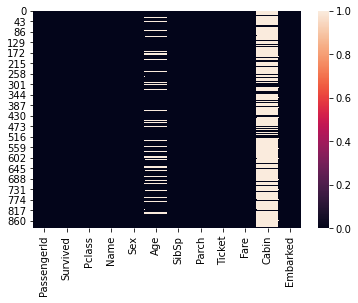

In [4]:
## Simplest heat map to detect null values
sns.heatmap(survivors.isnull())

<AxesSubplot:>

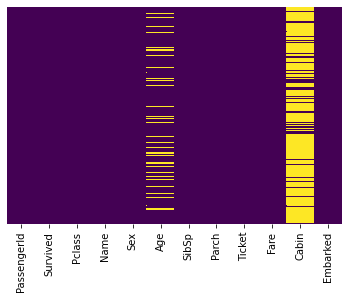

In [5]:
## Heatmap with certain upgradations
sns.heatmap(survivors.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## cbar=False ---> removes the rightmost side scale(from 0-1)
## yticklabels = False ---> Removes the y-axis labels

From above heatmap --> Only Age and Cabin has Null values in the datset.

<AxesSubplot:xlabel='Survived', ylabel='count'>

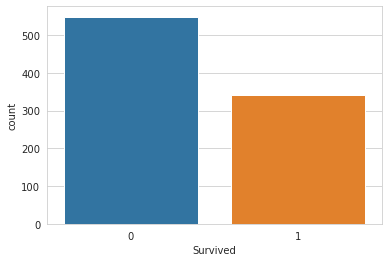

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=survivors)

Above countplot indicates --> people died are greater in no. as compared to people survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

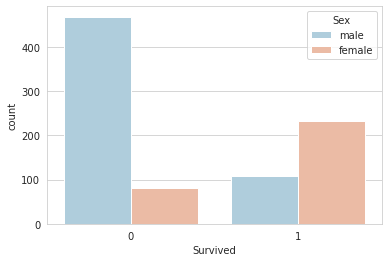

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=survivors,palette='RdBu_r')

Above counterplot shows ---> Very large no. of males had died as compared to females.  

<AxesSubplot:xlabel='Survived', ylabel='count'>

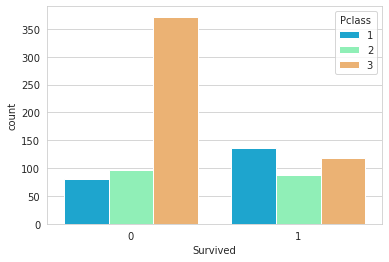

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=survivors,palette='rainbow')

Above countplot indicates --> rich people(pclass=1) have died less and survived more as compared to lower rich(pclass=1 or 2) people.

/home/ashish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

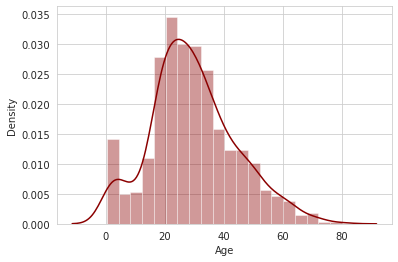

In [9]:
## dropna() method removes the null values
sns.set_style('whitegrid')
sns.distplot(survivors['Age'].dropna(),color='darkred')

In [10]:
type(survivors['Age'])

pandas.core.series.Series

/home/ashish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

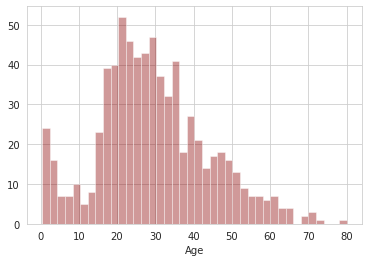

In [11]:
sns.set_style('whitegrid')
sns.distplot(survivors['Age'].dropna(),color='darkred',kde=False,bins=40)
## bins --> bins is how many bars you want to see

So the independent Variable Age folows a normal Distribution. So we may replace all the null values with the mean value.  

<AxesSubplot:>

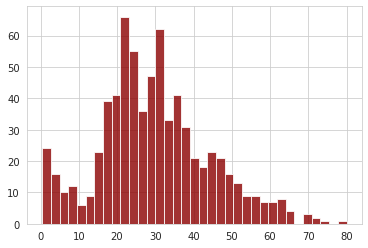

In [12]:
survivors['Age'].hist(color='darkred',bins=35,alpha=0.8)
## alpha --> an integer between 0 and 1 specifying the transparency of each histogram. 
## A lower value of alpha results in a more transparent histogram.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

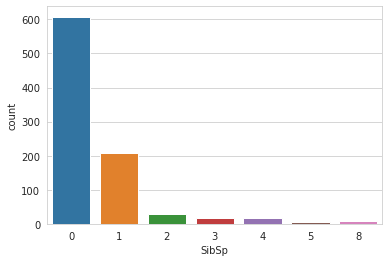

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=survivors)

Above countplot shows -- 600 people have zero/no sibling and spouse.
And aprrrox. 200 have 1 partner with them either sibling or spouse and so on...

<AxesSubplot:>

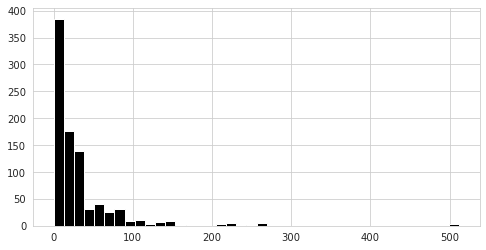

In [14]:
survivors['Fare'].hist(color='black',bins=40,figsize=(8,4))

This above histogram shows --> approximately 370 people have bought the ticket at the price of 1 to 10 unit. And so on....

# Cleaning the data for variables ::
    1. Age
    2. Cabin

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

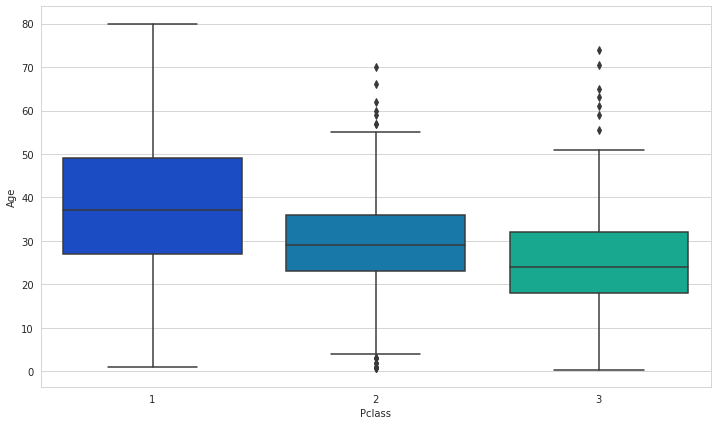

In [15]:
## We want to fill in missing age data instead of just dropping the missing age data rows. 
## One way to do this is by filling in the mean age of all the passengers (imputation). 
## However we can be smarter about this and check the average age by passenger class.

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=survivors,palette='winter')

In [16]:
## Now define a function According to it
def fill_nulls(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24        
    else:
        return age

In [17]:
## Applying the above function
survivors['Age'] = survivors[['Age','Pclass']].apply(fill_nulls,axis=True)

<AxesSubplot:>

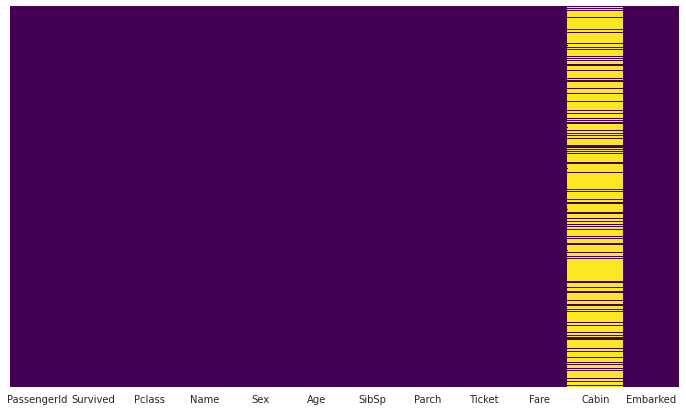

In [18]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.heatmap(survivors.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
## since cabin has lots of null values we can drop it for now
survivors.drop('Cabin',axis=1,inplace=True)
## inplace --> When inplace = True , the data is modified in place, 
## which means it will return nothing and the dataframe is now updated. 
## When inplace = False , which is the default, then the operation is performed and 
## it returns a copy of the object.
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
pd.get_dummies(survivors['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
gender = pd.get_dummies(survivors['Sex'],drop_first=True)
embark = pd.get_dummies(survivors['Embarked'],drop_first=True)

In [23]:
## Replace all categorical Variables with their dummies
survivors.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
survivors.head(n=7)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625


In [27]:
## Now add those dummies for the categorical variables
survivors = pd.concat([survivors,gender,embark],axis=1)
survivors

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Finally our data is cleaned!!!!

# Building a logistic Regression model for this

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
x_train, x_test, y_train, y_test = train_test_split(survivors.drop('Survived',axis=1), 
                                                    survivors['Survived'], test_size=0.30, 
                                                    random_state=101)

In [32]:
logit_model  = LogisticRegression()
logit_model.fit(x_train,y_train)

/home/ashish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions = logit_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
confusionmatrix = confusion_matrix(y_test,predictions)
confusionmatrix

array([[132,  22],
       [ 42,  72]])

In [38]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7611940298507462

## Logistic Regression Algorithm gives accuracy = 76.11% 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       154
           1       0.77      0.63      0.69       114

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



## Using Xgboost/XGBClassifier

In [40]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train,y_train)

/home/ashish/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:15:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = model.predict(x_test)
print("Accuracy :: ",accuracy_score(y_test,y_pred)*100)

Accuracy ::  79.1044776119403


## XGBClassifier Algorithm gives improved accuracy = 79.10% 